# Present the symbolic derivation of existing models

In [1]:
%matplotlib widget
import os, importlib, inspect
from IPython.display import display, Math, Latex, Markdown
from bmcs_matmod.gsm_lagrange.gsm_def import GSMDef, sp
from bmcs_matmod.gsm_lagrange.gsm_model import GSMModel
import numpy as np
import matplotlib.pyplot as plt


In [2]:
gsm_defs = []

# Collect all relevant modules and their classes
for file_name in os.listdir('.'):
    if file_name.endswith('.py') and file_name not in ['gsm_def.py', '__init__.py']:
        module_path = f"bmcs_matmod.gsm_lagrange.{file_name[:-3]}"
        module = importlib.import_module(module_path)
        for name, obj in inspect.getmembers(module, inspect.isclass):
            if issubclass(obj, GSMDef) and obj is not GSMDef:
                gsm_defs.append((name, obj))

# Sort the gsm_defs by class names
gsm_defs.sort(key=lambda x: x[0])

gsm_defs_dict = {name: obj for name, obj in gsm_defs}
gsm_models = {name: GSMModel(obj) for name, obj in gsm_defs}
gsm_defs_dict

{'GSM1D_ED': bmcs_matmod.gsm_lagrange.gsm1d_ed.GSM1D_ED,
 'GSM1D_EP': bmcs_matmod.gsm_lagrange.gsm1d_ep.GSM1D_EP,
 'GSM1D_EPD': bmcs_matmod.gsm_lagrange.gsm1d_epd.GSM1D_EPD,
 'GSM1D_EVP': bmcs_matmod.gsm_lagrange.gsm1d_evp.GSM1D_EVP,
 'GSM1D_EVPD': bmcs_matmod.gsm_lagrange.gsm1d_evpd.GSM1D_EVPD,
 'GSM1D_VE': bmcs_matmod.gsm_lagrange.gsm1d_ve.GSM1D_VE,
 'GSM1D_VED': bmcs_matmod.gsm_lagrange.gsm1d_ved.GSM1D_VED,
 'GSM1D_VEVP': bmcs_matmod.gsm_lagrange.gsm1d_vevp.GSM1D_VEVP,
 'GSM1D_VEVPD': bmcs_matmod.gsm_lagrange.gsm1d_vevpd.GSM1D_VEVPD}

In [3]:
mparams = dict(E = 20, K = 5, S = 2, c = 1, r = 1, eps_0 = 0, f_c = 15, eta_vp=10, eta_ve=100)

In [4]:
n_t = 151
n_I = 1
eps_max = 2.5
final_time = 10
t_t = np.linspace(0, final_time, n_t)
eps_n_t = np.linspace(0, eps_max, n_t)
response = {}
selection = [] # ['GSM1D_VEVP', 'GSM1D_VEVPD']
if len(selection) == 0:
    selection = gsm_models.keys()
for name in selection:
    gsm = gsm_models[name]
    gsm.set_params(**mparams)
    print(f'name: {name}')
    response[name] = gsm.get_F_response(eps_n_t, t_t)

name: GSM1D_ED
name: GSM1D_EP
name: GSM1D_EPD
name: GSM1D_EVP
name: GSM1D_EVPD
name: GSM1D_VE
name: GSM1D_VED
name: GSM1D_VEVP
name: GSM1D_VEVPD


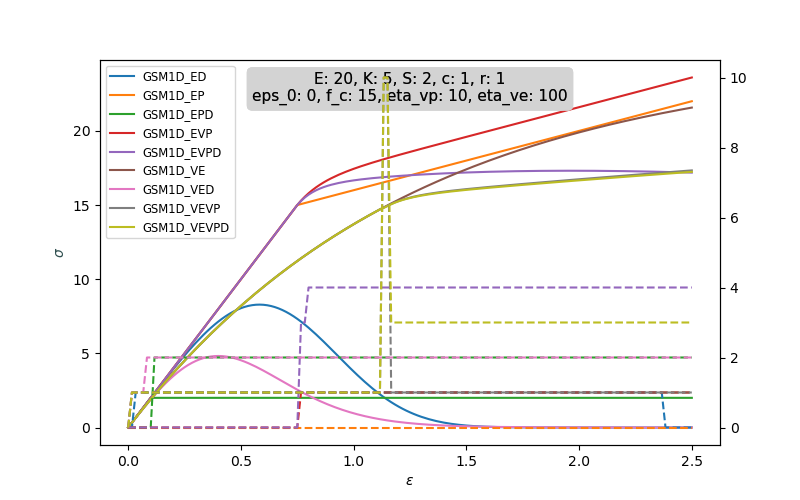

In [5]:
fig, ax_sig = plt.subplots(1, 1, figsize=(8, 5))

ax_iter = ax_sig.twinx()

for name, rd in response.items():
    eps_t = rd.eps_t[:, 0]
    iter_t = rd.iter_t[:, 0]
    sig_t = rd.sig_t[:, 0, 0]
    ax_sig.plot(eps_t, sig_t, label=rf'{name}')
    ax_iter.plot(eps_t, iter_t, label=rf'{name}', ls='dashed')
    # Add a box with the material parameters
    param_text = ', '.join([f'{key}: {value}' for key, value in mparams.items()])
    param_text = '\n'.join([', '.join(param_text.split(', ')[i:i+5]) for i in range(0, len(param_text.split(', ')), 5)])
    props = dict(boxstyle='round', facecolor='lightgray', edgecolor='lightgray', alpha=0.5)
    ax_sig.text(0.5, 0.97, param_text, transform=ax_sig.transAxes, fontsize=11,
                verticalalignment='top', horizontalalignment='center', bbox=props)
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend(fontsize='small')


In [6]:
mparams = dict(E = 20, K = 10, S = .2, c = 1, r = 1, eps_0 = 0, f_c = 7, eta_vp=10, eta_ve=10)

n_t = 151
n_I = 1
sig_max = 16
final_time = 30
t_t = np.linspace(0, final_time, n_t)
sig_n_t = np.linspace(0, sig_max, n_t)
response = {}
selection = ['GSM1D_EVPD', 'GSM1D_VEVP', 'GSM1D_VEVPD']
if len(selection) == 0:
    selection = gsm_models.keys()
for name in selection:
    gsm = gsm_models[name]
    gsm.set_params(**mparams)
    print(f'name: {name}')
    response[name] = gsm.get_G_response(sig_n_t, t_t)

name: GSM1D_EVPD
Processing variable: Matrix([[\varepsilon^\mathrm{p}]]), codename = eps_p_a, shape = (1, 1), n_flat = 1
Processing variable: Matrix([[\omega]]), codename = omega_a, shape = (1, 1), n_flat = 1
Processing variable: Matrix([[z]]), codename = z_a, shape = (1, 1), n_flat = 1
name: GSM1D_VEVP
Processing variable: Matrix([[\varepsilon^\mathrm{ve}]]), codename = eps_v_a, shape = (1, 1), n_flat = 1
Processing variable: Matrix([[\varepsilon^\mathrm{vp}]]), codename = eps_p_a, shape = (1, 1), n_flat = 1
Processing variable: Matrix([[z]]), codename = z_a, shape = (1, 1), n_flat = 1
name: GSM1D_VEVPD
Processing variable: Matrix([[\varepsilon^\mathrm{ve}]]), codename = eps_v_a, shape = (1, 1), n_flat = 1
Processing variable: Matrix([[\varepsilon^\mathrm{vp}]]), codename = eps_p_a, shape = (1, 1), n_flat = 1
Processing variable: Matrix([[\omega]]), codename = omega_a, shape = (1, 1), n_flat = 1
Processing variable: Matrix([[z]]), codename = z_a, shape = (1, 1), n_flat = 1


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

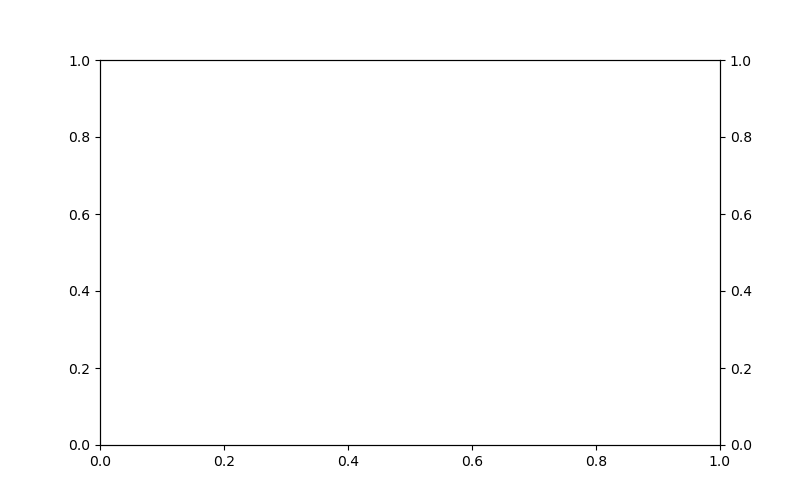

In [7]:
fig, ax_sig = plt.subplots(1, 1, figsize=(8, 5))

ax_iter = ax_sig.twinx()

for name, rd in response.items():
    eps_t = rd.eps_t[:, 0]
    iter_t = rd.iter_t[:, 0]
    sig_t = rd.sig_t[:, 0, 0]
    ax_sig.plot(eps_t, sig_t, label=rf'{name}')
    ax_iter.plot(eps_t, iter_t, label=rf'{name}', ls='dashed')
    # Add a box with the material parameters
    param_text = ', '.join([f'{key}: {value}' for key, value in mparams.items()])
    param_text = '\n'.join([', '.join(param_text.split(', ')[i:i+5]) for i in range(0, len(param_text.split(', ')), 5)])
    props = dict(boxstyle='round', facecolor='lightgray', edgecolor='lightgray', alpha=0.5)
    ax_sig.text(0.5, 0.97, param_text, transform=ax_sig.transAxes, fontsize=11,
                verticalalignment='top', horizontalalignment='center', bbox=props)
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend(fontsize='small')
